In [1]:
#load libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange,uniform

In [2]:
#load data
df = pd.read_csv("C:\\Users\\PUNEET SINGH\\BankNote_Authentication.csv")

In [3]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
# CHECKING THE INFORMATION OF THE DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance    1372 non-null float64
skewness    1372 non-null float64
curtosis    1372 non-null float64
entropy     1372 non-null float64
class       1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
#missing values
df.isnull().sum().sort_values(ascending = False)

class       0
entropy     0
curtosis    0
skewness    0
variance    0
dtype: int64

In [7]:
df['class'].unique()

array([0, 1], dtype=int64)

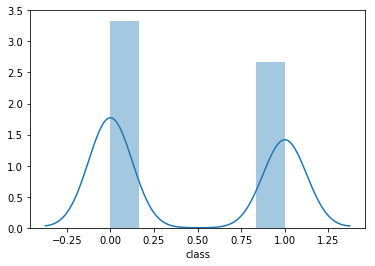

In [8]:
#univariate analysis
#target variable analysis
#check whether target variable is normal or not
sns.distplot(df["class"])

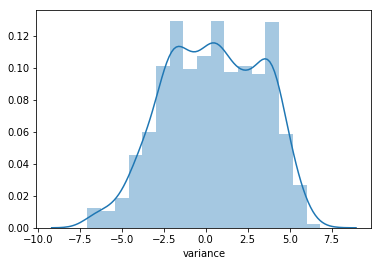

In [9]:
#distribution of independent numeric variables
#check whether "variance" is normal or not
sns.distplot(df['variance'])

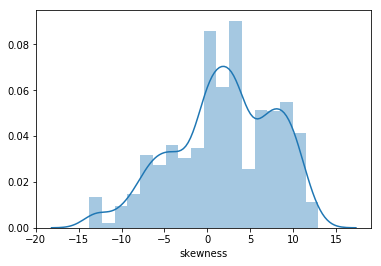

In [10]:
#check whether "skewness" is normal or not
sns.distplot(df["skewness"])

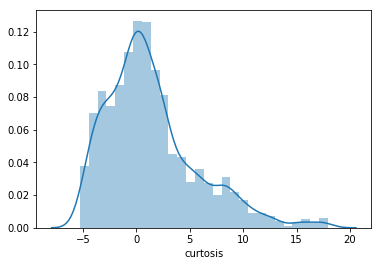

In [11]:
#check whether "curtosis" is normal or not
sns.distplot(df["curtosis"])

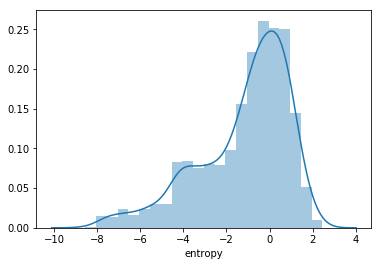

In [12]:
#check whether "entropy" is normal or not
sns.distplot(df["entropy"])

In [13]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

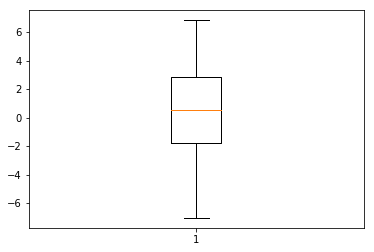

In [14]:
#checking the ouliers in the data 
plt.boxplot(df["variance"])
plt.show()

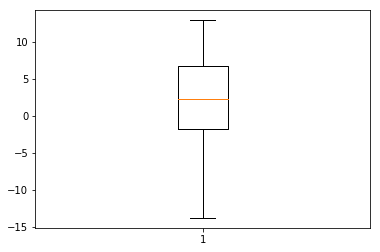

In [15]:
plt.boxplot(df["skewness"])
plt.show()

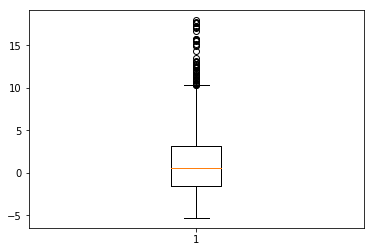

In [16]:
plt.boxplot(df["curtosis"])
plt.show()

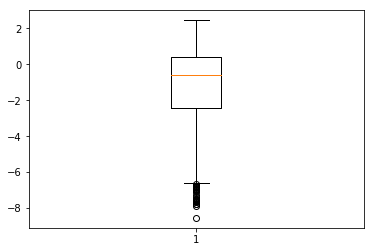

In [17]:
plt.boxplot(df["entropy"])
plt.show()

In [18]:
#there are outliers in "curtosis"  and "entropy" varibale

In [19]:
#checking the outliers through z score
#importing the library
from scipy.stats import zscore

In [20]:
z= np.abs(zscore(df.iloc[:,0:-1 ]))
z

array([[1.12180565, 1.14945512, 0.97597007, 0.35456135],
       [1.44706568, 1.06445293, 0.89503626, 0.12876744],
       [1.20780971, 0.77735215, 0.12221838, 0.61807317],
       ...,
       [1.47235682, 2.62164576, 3.75901744, 0.75488418],
       [1.40669251, 1.75647104, 2.552043  , 0.04315848],
       [1.04712236, 0.43982168, 0.29861555, 1.1364645 ]])

In [21]:
thresold = 3 
print(np.where(z>3))

(array([  45,   47,  194,  202,  291,  394,  465,  529,  562,  581,  740,
        765,  820,  826,  881,  887,  942,  948,  974, 1003, 1009, 1064,
       1070, 1125, 1131, 1142, 1186, 1192, 1203, 1218, 1247, 1253, 1264,
       1308, 1314, 1369], dtype=int64), array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2], dtype=int64))


In [22]:
#removing the outliers of the data 
train_df = df[(z<3).all(axis = 1)]
train_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [23]:
train_df.describe()

,variance,skewness,curtosis,entropy,class
count,1336.000000,1336.000000,1336.000000,1336.000000,1336.000000
mean,0.541743,2.047151,1.194939,-1.104041,0.437874
std,2.791934,5.581026,3.950610,1.999963,0.496311
min,-7.042100,-13.286900,-5.286100,-7.398700,0.000000
25%,-1.668425,-1.412825,-1.654025,-2.215650,0.000000
50%,0.570065,2.334150,0.557085,-0.562090,0.000000
75%,2.879750,6.761375,3.089500,0.412910,1.000000
max,6.824800,12.951600,13.472700,2.449500,1.000000


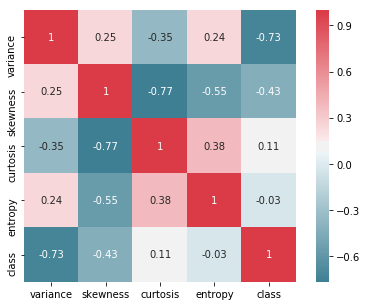

In [24]:
#finding the corelation between continous variables
f,ax = plt.subplots(figsize = (7,5))
corr = train_df.corr()
sns.heatmap(corr,mask = np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10, as_cmap = True ),square = True,ax=ax,annot= True)
plt.show()


In [25]:
#decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [26]:
#divide data in train and test
X = train_df.values[:,0:4]
Y = train_df.values[:,4]
X_train,X_test,y_train ,y_test =train_test_split(X,Y,test_size = 0.2)

In [27]:
#Decision tree
C50_model = tree.DecisionTreeClassifier(criterion ='entropy').fit(X_train,y_train)


#predict new test cases
C50_predictions = C50_model.predict(X_test)

In [28]:
#build confusion matrix
CM = pd.crosstab(y_test,C50_predictions)
#let us save TP,TN,FP,FN
TP=CM.iloc[1,1]
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]

In [29]:
#check accuracy of the model
((TP+TN)*100)/(TP+TN+FP+FN)

97.01492537313433

In [30]:
#false negative rate
((FN*100)/(FN+TP))

3.389830508474576

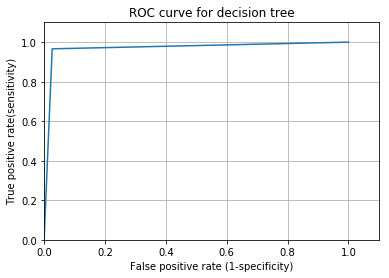

In [31]:
#ROC CURVE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr,tpr,threshold = metrics.roc_curve(y_test,C50_predictions)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC curve for decision tree")
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate(sensitivity)")
plt.grid(True)

In [32]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 20).fit(X_train,y_train)

In [33]:
RF_predictions = RF_model.predict(X_test)

In [34]:
#build confusion matrix
CM = pd.crosstab(y_test,RF_predictions)

#let us save TP,TN.FP.FN
TP=CM.iloc[1,1]
TN=CM.iloc[0,0]
FN=CM.iloc[1,0]
FP=CM.iloc[0,1]


In [35]:
#accuracy of the model
((TP+TN)*100)/(TP+TN+FN+FP)

99.6268656716418

In [36]:
#false negative rate 
(FN*100)/(FN+TP)

0.0

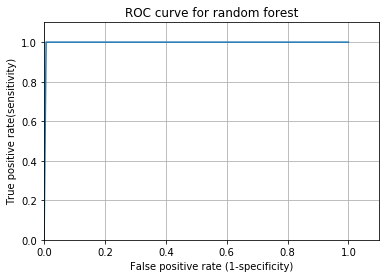

In [37]:
#ROC CURVE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr,tpr,threshold = metrics.roc_curve(y_test,RF_predictions)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC curve for random forest")
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate(sensitivity)")
plt.grid(True)

In [38]:
#import libraries for logistic regression
from sklearn import tree
from sklearn.metrics import accuracy_score

In [39]:
Sample_index = np.random.rand(len(train_df))<0.8

train = train_df[Sample_index]
test = train_df[~Sample_index]

In [40]:
#select column index for independent variables 
train_cols = train.columns[0:4]

In [41]:
#Build logistic regression 
import statsmodels.api as sm

logit = sm.Logit(train['class'],train[train_cols]).fit()
logit.summary()

Optimization terminated successfully.
         Current function value: 0.090481
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                 1091
Model:                          Logit   Df Residuals:                     1087
Method:                           MLE   Df Model:                            3
Date:                Wed, 18 Dec 2019   Pseudo R-squ.:                  0.8680
Time:                        18:15:39   Log-Likelihood:                -98.715
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                2.730e-281
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
variance      -2.8737      0.301     -9.556      0.000      -3.463      -2.284
skewness      -1.6923      0.219     -7.734      0.000      -2.121      -1.263
curtosis      -1.8221      0.224     -8.138      0.000      -2.261      -1.383
entropy       -0.9204      0.171     -5.390      0.000      -1.255      -0.586
==============================================================================

Possibly complete quasi-separation: A fraction 0.52 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [42]:
#predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['Actual_val'] = 1
test.loc[test.Actual_prob <0.5,"Actual_val"] = 0

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

In [43]:
#Build confusion matrix
CM =pd.crosstab(test['class'],test['Actual_val'])

#let us save TP.TN,FP,FN
TP=CM.iloc[1,1]
TN=CM.iloc[0,0]
FP=CM.iloc[0,1]
FN=CM.iloc[1,0]


In [44]:
#accuracy of the model
((TP+TN)*100)/(TP+TN+FP+FN)

93.87755102040816

In [45]:
#FALSE NEGATIVE RATE
(FN*100)/(FN+TP)


14.150943396226415

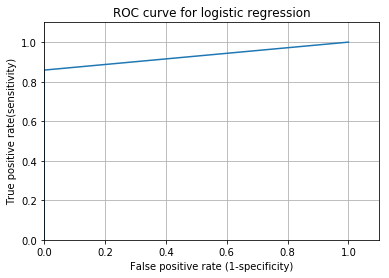

In [46]:
#ROC CURVE
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr,tpr,threshold = metrics.roc_curve(test["class"],test["Actual_val"])
plt.plot(fpr,tpr)
plt.xlim([0.0,1.1])
plt.ylim([0.0,1.1])
plt.title("ROC curve for logistic regression")
plt.xlabel("False positive rate (1-specificity)")
plt.ylabel("True positive rate(sensitivity)")
plt.grid(True)

In [47]:
#conclusion : Random forest is the best suited for the model as it has high accuracy and false negative rate is low. The ROC is also good.